In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import polars as pl
import scipy.io
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np 
from typing import Literal
import torch 
from torch import nn
from transphorm.model_components import AATrialDataModule, TrialClassifer, LSTMClassifer
from dotenv import load_dotenv
import os
load_dotenv()
data_path = Path(os.getenv('TRIAL_DATA_PATH'))
model_path = "/Users/mds8301/Development/transphorm/models/aa-classifiers/a0383409f8fe4c3683f83cda885528e0/checkpoints/trial_lstm_clf_v2.ckpt"

In [40]:

model = TrialClassifer.load_from_checkpoint(model_path)
model.eval()
model.to('cpu')

/Users/mds8301/anaconda3/envs/transphorm/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.


TrialClassifer(
  (model): LSTMClassifer(
    (lstm): LSTM(6104, 8, num_layers=2, batch_first=True)
    (batch_norm): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (fc): Linear(in_features=8, out_features=1, bias=True)
  )
  (loss_fn): CrossEntropyLoss()
)

In [41]:
data= AATrialDataModule(data_path)
data.prepare_data()
data.setup('test')

In [57]:
test_logits = model(data.test[:][0])
test_class = model.classify(test_logits).squeeze()

torch.mean(data.test[:][1])

tensor(0.3826)

In [15]:

import torchmetrics as tm


accuracy = tm.classification.Accuracy(task="binary", num_classes=2)
# confusion_matrix = tm.classification.ConfusionMatrix(task="binary")
auroc = tm.classification.AUROC(task="binary")
f1_score = tm.classification.F1Score(task="binary", num_classes=2)

# Initialize F1 Score metric

# Create some example predictions and targets
predictions = torch.tensor([0, 1, 1, 0, 1, 1, 0, 1])
targets = torch.tensor([0, 1, 1, 0, 1, 1, 0, 1])

# Calculate F1 Score
f1 = f1_score(predictions, targets)

print(f"F1 Score: {f1.item():.4f}")

F1 Score: 1.0000


In [10]:
from scipy import signal
def low_pass_filter(data, cutoff, order = 5):
    nyq = 0.5 * 1017
    norm_cutoff = cutoff/nyq 
    b, a = signal.butter(order, norm_cutoff, btype = 'low', analog = False)
    filtered_data = signal.filtfilt(b,a,data)
    return filtered_data
filt_test = low_pass_filter(test, cutoff = 1, order = 1)
# plt.plot(test_1)
# plt.plot(filt_test)
# tens = torch.Tensor(filt_test)
tens = filt_test.copy()
filt_f = torch.Tensor(tens)
filt_f.size()

torch.Size([2759, 6104])

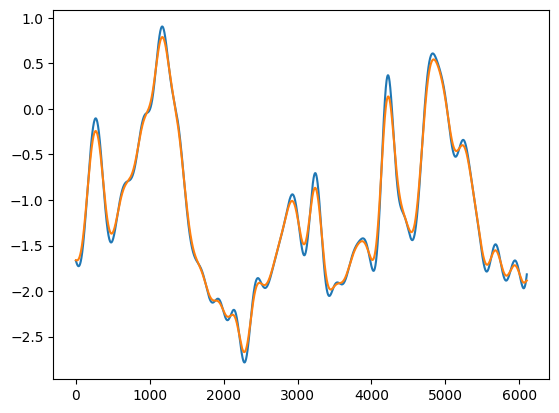

In [87]:
plt.plot(test)
plt.plot(filt_test)